# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study_complete['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_Timepoint_duplicate = mouse_study_complete[mouse_study_complete.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]
mouse_duplicate = mouse_Timepoint_duplicate['Mouse ID'].unique() 
mouse_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_complete.loc[mouse_study_complete['Mouse ID']== 'g989',:]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_complete.drop_duplicates(subset=['Mouse ID'])
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_Tumor_volume = summary_table.mean()
Median_Tumor_volume = summary_table.median()
Variance_Tumor_volume = summary_table.var()
Std_Tumor_volume = summary_table.std()
SEM_Tumor_volume = summary_table.sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_study_by_tumor = pd.DataFrame({'Mean Tumor volume': Mean_Tumor_volume,
                                    'Median Tumor volume': Median_Tumor_volume,
                                   'Tumor volume Variance': Variance_Tumor_volume,
                                    'Tumor volume Std. Dev': Std_Tumor_volume,                                
                                    'Tumor volume Std.Err': SEM_Tumor_volume})

mouse_study_by_tumor

,Mean Tumor volume,Median Tumor volume,Tumor volume Variance,Tumor volume Std. Dev,Tumor volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = mouse_study_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_by_tumor = summary_table.agg(['mean','median', 'var', 'std', 'sem'])
mouse_study_by_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

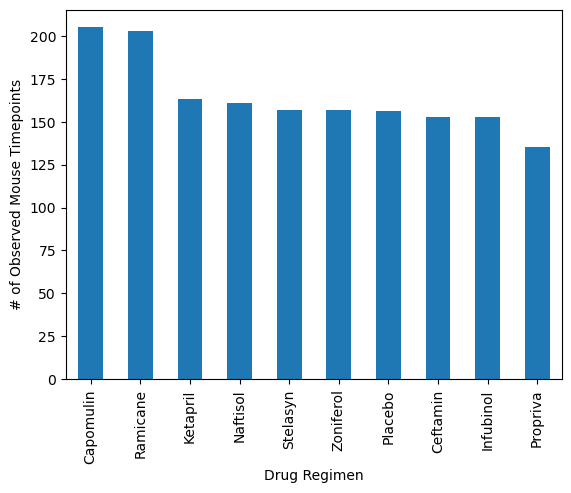

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
table_1 = pd.DataFrame(mouse_study_complete.loc[mouse_study_complete['Timepoint']>0,:])
drug_regimen_group = table_1.groupby('Drug Regimen')
drug_regimen_details =  drug_regimen_group['Timepoint'].count()
drug_regimen_details = drug_regimen_details.sort_values(ascending=False)

drug_chart = drug_regimen_details.plot(kind="bar")   
drug_chart.set_xlabel("Drug Regimen")                       
drug_chart.set_ylabel("# of Observed Mouse Timepoints")
                       
plt.show()
plt.tight_layout()

In [10]:
drug_regimen_details = drug_regimen_details.sort_values(ascending=False)
drug_regimen_details

Drug Regimen
Capomulin    205
Ramicane     203
Ketapril     163
Naftisol     161
Stelasyn     157
Zoniferol    157
Placebo      156
Ceftamin     153
Infubinol    153
Propriva     135
Name: Timepoint, dtype: int64

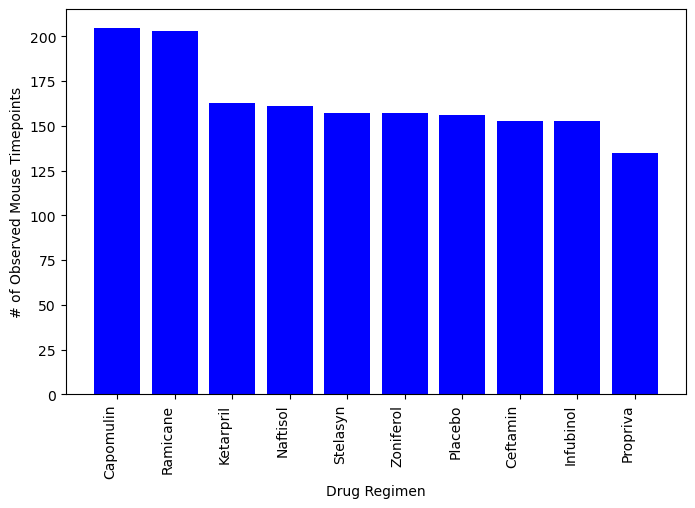

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
categories = ['Capomulin', 'Ramicane', 'Ketarpril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
values = [205, 203, 163, 161, 157, 157, 156, 153, 153, 135]
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color = 'blue')
plt.xlabel("Drug Regimen")                       
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha='right')
plt.show()

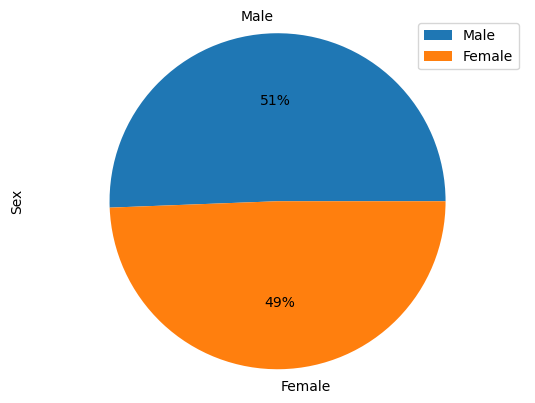

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_count = mouse_study_complete.loc[mouse_study_complete["Sex"]=="Male",:]['Mouse ID'].count()
female_count = mouse_study_complete.loc[mouse_study_complete["Sex"]=="Female",:]['Mouse ID'].count()
sex = {'Sex': ['Male','Female'],
        'Count':[male_count,female_count]}
sex_data = pd.DataFrame(sex)
labels= ["Male", "Female"]
sex_pie = sex_data.plot(kind="pie", y ='Count', labels = labels,autopct="%1.0f%%", shadow=False, startangle=0)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()


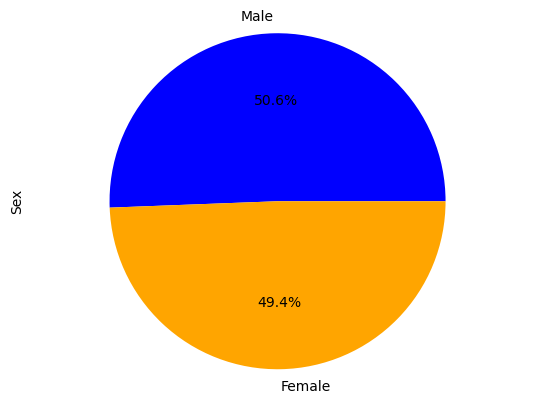

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_data = mouse_study_complete.loc[mouse_study_complete["Sex"]=="Male",:]['Mouse ID'].count()
female_data = mouse_study_complete.loc[mouse_study_complete["Sex"]=="Female",:]['Mouse ID'].count()
labels= ["Male", "Female"]
sizes = [male_data,female_data] 
colors= ["blue", "orange"]
explode = (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Capomulin",:]['Tumor Volume (mm3)'].sum()
Ramicane_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Ramicane",:]['Tumor Volume (mm3)'].sum()
Infubinol_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Infubinol",:]['Tumor Volume (mm3)'].sum()
Ceftamin_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Ceftamin",:]['Tumor Volume (mm3)'].sum()
final_volume = mouse_study_complete.groupby("Drug Regimen")['Tumor Volume (mm3)'].sum()
# Start by getting the last (greatest) timepoint for each mouse
greatest_mouse = mouse_study_complete.groupby("Drug Regimen")['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_data = pd.merge(final_volume, greatest_mouse,how="left", on=["Drug Regimen"]) 
combined_data

,Tumor Volume (mm3),Timepoint
Drug Regimen,,
Capomulin,9355.420462,45
Ceftamin,9361.228582,45
Infubinol,9413.493529,45
Ketapril,10384.299876,45
Naftisol,10105.671026,45
Placebo,9780.078122,45
Propriva,8423.930878,45
Ramicane,9169.417875,45
Stelasyn,9816.199991,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = mouse_study_complete["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_study_complete['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Capomulin",:]['Tumor Volume (mm3)'].value_counts()
Ramicane_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Ramicane",:]['Tumor Volume (mm3)'].value_counts()
Infubinol_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Infubinol",:]['Tumor Volume (mm3)'].value_counts()
Ceftamin_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"]=="Ceftamin",:]['Tumor Volume (mm3)'].value_counts()
    
    # add subset 


print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
outlier_occupancy = mouse_study_complete.loc[(mouse_study_complete['Tumor Volume (mm3)'] < lower_bound) | (mouse_study_complete['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy



The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 56.29220039
The interquartile range of occupancy is: 11.292200389999998
The the median of occupancy is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1605,k403,35,26.546993,1,Ramicane,Male,21,16
1628,k403,40,24.365505,1,Ramicane,Male,21,16
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1690,p189,40,74.106091,4,Ketapril,Male,8,28
1714,l725,40,73.693494,3,Naftisol,Female,8,26
1774,p189,45,75.294936,4,Ketapril,Male,8,28
1775,m650,45,73.901399,4,Ketapril,Male,15,27
1778,o331,45,78.567014,4,Ketapril,Male,24,30
1796,h246,45,74.104086,2,Ketapril,Male,13,30
1803,k382,45,73.715619,4,Ketapril,Male,22,29


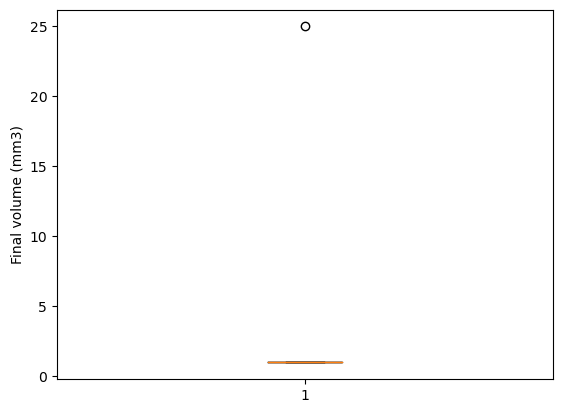

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final volume (mm3)')
ax1.boxplot(Capomulin_volume)
plt.show()

## Line and Scatter Plots

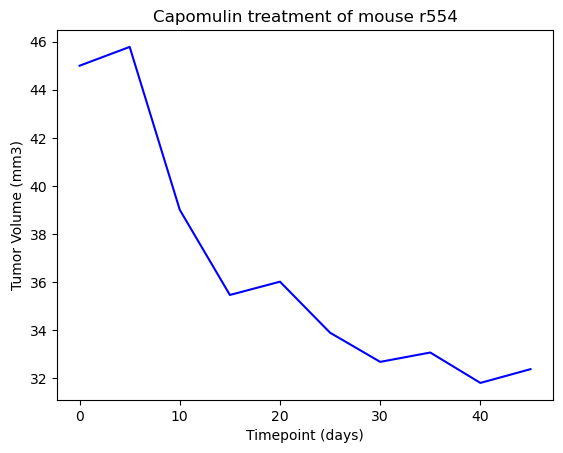

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = mouse_study_complete[mouse_study_complete['Drug Regimen']=='Capomulin']
capomulin_data_clean = capomulin_data[capomulin_data['Mouse ID'] == 'r554']
tumor_volume_count = capomulin_data_clean ["Tumor Volume (mm3)"]
timepoint_count = capomulin_data_clean["Timepoint"]

capomulin_chart = plt.plot(timepoint_count,tumor_volume_count, color = "blue")
plt.xlabel("Timepoint (days)")                       
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse r554")
                       
plt.show()

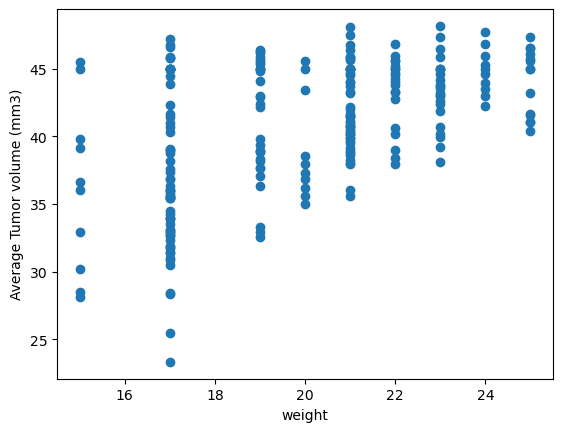

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_data['Weight (g)']
tumor_volume_avg = capomulin_data["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel("weight")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()


In [19]:
tumor_volume_avg = mouse_study_complete["Tumor Volume (mm3)"].mean()
tumor_volume_avg

50.448380631336505

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(mouse_weight, tumor_volume_avg)[0],2)}")


TypeError: object of type 'numpy.float64' has no len()